<a href="https://colab.research.google.com/github/LianaHuang99/GoogleMLCrashCourse/blob/main/ProductDemandPredictor_surfactant_logMass_after2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
warnings.filterwarnings('ignore')


In [99]:
pd.set_option('display.max_columns', None)

In [100]:
df = pd.read_csv('alkylbenzene_filtered.csv')

In [101]:
df.shape

(5171, 32)

In [102]:
df.head()

,no_chem_recs,carrier_status,UploadKey,bgLatitude,Latitude,TotalBaseWaterVolume,StateName,WellName,TotalBaseNonWaterVolume,TVD,bgLongitude,APINumber,Longitude,OperatorName,CountyName,primarySupplier,date,bgCountyName,bgStateName,bgOperatorName,IngredientName,bgCAS,calcMass,Supplier,PercentHFJob,bgSupplier,TradeName,is_valid_cas,categoryCAS,Purpose,CASNumber,bgIngredientName
0,False,auto-detected,0021798d-61e3-4f1e-9f4b-4573611c52a1,27.027056,27.026730,111934.0,Texas,MRS SK East #232,0.0,13634.0,-97.857459,42261315930000,-97.857176,"Headington Energy Partners, LLC",Kenedy,halliburton,2018-11-30,kenedy,texas,headington,alkylbenzene sulfonate compd. with 2-propanamine,proprietary,81.443628,MISSING,0.006416,missing,NaN,True,proprietary,NaN,Proprietary,NaN
1,False,auto-detected,0021798d-61e3-4f1e-9f4b-4573611c52a1,27.027056,27.026730,111934.0,Texas,MRS SK East #232,0.0,13634.0,-97.857459,42261315930000,-97.857176,"Headington Energy Partners, LLC",Kenedy,halliburton,2018-11-30,kenedy,texas,headington,alkyl benzene sulfonate,proprietary,81.443628,MISSING,0.006416,missing,NaN,True,proprietary,NaN,Proprietary,NaN
2,False,auto-detected,0027f3d1-50fb-4031-bfdb-6c7e71f22e13,31.449594,31.449460,262030.0,Texas,Braman Minerals 45 18,0.0,6150.0,-103.454001,42475364720000,-103.453550,Occidental Oil and Gas,Ward,baker,2013-07-05,ward,texas,occidental,alkylaryl sulfonate,68584-27-0,0.180060,MISSING,0.000008,missing,NaN,True,perfect match,Other Chemicals,68584-27-0,"benzenesulfonic acid, c10-16-alkyl derivs., po..."
3,False,auto-detected,002bd88a-b20f-4953-bb3f-01cfb269351a,32.284760,32.284637,18134964.0,New Mexico,FORTY NINER RIDGE UNIT 105H,0.0,9780.0,-103.862892,30015442190000,-103.862403,MEWBOURNE OIL COMPANY,Eddy,halliburton,2018-03-12,eddy,new mexico,mewbourne,alkylbenzene sulfonate compd. with 2-propanamine,68584-25-8,6726.526523,MISSING,0.003948,missing,NaN,True,perfect match,NaN,68584-25-8,"benzenesulfonic acid, c10-16-alkyl derivs., co..."
4,False,auto-detected,002bd88a-b20f-4953-bb3f-01cfb269351a,32.284760,32.284637,18134964.0,New Mexico,FORTY NINER RIDGE UNIT 105H,0.0,9780.0,-103.862892,30015442190000,-103.862403,MEWBOURNE OIL COMPANY,Eddy,halliburton,2018-03-12,eddy,new mexico,mewbourne,alkylbenzene sulfonate compd. with triethanola...,68584-24-7,6726.526523,MISSING,0.003948,missing,NaN,True,perfect match,NaN,68584-24-7,"benzenesulfonic acid, c10-16-alkyl derivs., co..."


In [103]:
df.columns

Index(['no_chem_recs', 'carrier_status', 'UploadKey', 'bgLatitude', 'Latitude',
       'TotalBaseWaterVolume', 'StateName', 'WellName',
       'TotalBaseNonWaterVolume', 'TVD', 'bgLongitude', 'APINumber',
       'Longitude', 'OperatorName', 'CountyName', 'primarySupplier', 'date',
       'bgCountyName', 'bgStateName', 'bgOperatorName', 'IngredientName',
       'bgCAS', 'calcMass', 'Supplier', 'PercentHFJob', 'bgSupplier',
       'TradeName', 'is_valid_cas', 'categoryCAS', 'Purpose', 'CASNumber',
       'bgIngredientName'],
      dtype='object')

In [104]:
df.describe()

,bgLatitude,Latitude,TotalBaseWaterVolume,TotalBaseNonWaterVolume,TVD,bgLongitude,Longitude,calcMass,PercentHFJob
count,5171.000000,5171.000000,5.171000e+03,5.144000e+03,5171.000000,5171.000000,5171.000000,5171.000000,5.171000e+03
mean,30.502906,30.503216,1.166685e+07,5.916572e+04,10199.458054,-99.069903,-99.069877,4998.230624,4.536546e-03
std,2.635144,2.635562,1.044548e+07,7.829633e+05,19164.090340,3.635812,3.635500,16932.529183,1.639087e-02
min,26.175703,26.175352,3.530000e+03,0.000000e+00,0.000000,-119.669504,-119.669505,0.026917,4.427847e-07
25%,28.598672,28.597617,4.205464e+06,0.000000e+00,8150.000000,-102.047326,-102.046911,46.872156,1.215731e-04
50%,30.490231,30.490030,1.077416e+07,0.000000e+00,10251.000000,-98.969362,-98.969210,1477.224170,3.773123e-03
75%,32.094640,32.094878,1.751373e+07,0.000000e+00,11630.000000,-97.712181,-97.711900,7291.610402,7.466885e-03
max,48.185635,48.185635,3.467892e+08,2.946064e+07,968226.000000,-80.111851,-80.111853,782687.966876,8.052519e-01


In [105]:
df.isna().sum()

,0
no_chem_recs,0
carrier_status,0
UploadKey,0
bgLatitude,0
Latitude,0
TotalBaseWaterVolume,0
StateName,0
WellName,0
TotalBaseNonWaterVolume,27
TVD,0


In [106]:
duplicated = df[df.duplicated(subset = None, keep=False)]

In [107]:
duplicated

,no_chem_recs,carrier_status,UploadKey,bgLatitude,Latitude,TotalBaseWaterVolume,StateName,WellName,TotalBaseNonWaterVolume,TVD,bgLongitude,APINumber,Longitude,OperatorName,CountyName,primarySupplier,date,bgCountyName,bgStateName,bgOperatorName,IngredientName,bgCAS,calcMass,Supplier,PercentHFJob,bgSupplier,TradeName,is_valid_cas,categoryCAS,Purpose,CASNumber,bgIngredientName
720,False,auto-detected,20e49361-01db-48b6-8f7a-bb824dd17650,40.161330,40.161331,38053974.0,Pennsylvania,596505 (1H),0.0,7556.40,-80.112070,37125281570000,-80.112072,"Rice Drilling B, LLC",Washington,ftsi,2017-10-22,washington,pennsylvania,rice,"linear alkyl benzene sulfonate, na salt",25155-30-0,66.868626,MISSING,0.000019,missing,NaN,True,perfect match,NaN,25155-30-0,"benzenesulfonic acid, dodecyl-, sodium salt (1:1)"
721,False,auto-detected,20e49361-01db-48b6-8f7a-bb824dd17650,40.161330,40.161331,38053974.0,Pennsylvania,596505 (1H),0.0,7556.40,-80.112070,37125281570000,-80.112072,"Rice Drilling B, LLC",Washington,ftsi,2017-10-22,washington,pennsylvania,rice,"linear alkyl benzene sulfonate, na salt",25155-30-0,66.868626,MISSING,0.000019,missing,NaN,True,perfect match,NaN,25155-30-0,"benzenesulfonic acid, dodecyl-, sodium salt (1:1)"
1532,False,auto-detected,472b3ceb-d6dd-4440-8c96-5685bd6a0338,31.843617,31.843450,23444134.0,Louisiana,HA RA SUZ;BSMC LA 18-7 HC #1-ALT,0.0,11131.00,-93.835195,17085224590000,-93.835007,Comstock Oil & Gas,Sabine,halliburton,2017-11-14,sabine,louisiana,comstock,alkylbenzene sulfonate compd.,proprietary,70.000234,MISSING,0.000032,missing,NaN,True,proprietary,NaN,Proprietary,NaN
1533,False,auto-detected,472b3ceb-d6dd-4440-8c96-5685bd6a0338,31.843617,31.843450,23444134.0,Louisiana,HA RA SUZ;BSMC LA 18-7 HC #1-ALT,0.0,11131.00,-93.835195,17085224590000,-93.835007,Comstock Oil & Gas,Sabine,halliburton,2017-11-14,sabine,louisiana,comstock,alkylbenzene sulfonate compd.,proprietary,70.000234,MISSING,0.000032,missing,NaN,True,proprietary,NaN,Proprietary,NaN
2351,False,auto-detected,7204a1ae-c900-4ea6-8243-1f95c7bac417,40.161221,40.161222,24181374.0,Pennsylvania,Master Splinter 596507 (5H),0.0,7575.02,-80.111962,37125281590000,-80.111964,"Rice Drilling B, LLC",Washington,ftsi,2017-11-18,washington,pennsylvania,rice,"linear alkyl benzene sulfonate, na salt",25155-30-0,276.611144,MISSING,0.000122,missing,NaN,True,perfect match,NaN,25155-30-0,"benzenesulfonic acid, dodecyl-, sodium salt (1:1)"
2352,False,auto-detected,7204a1ae-c900-4ea6-8243-1f95c7bac417,40.161221,40.161222,24181374.0,Pennsylvania,Master Splinter 596507 (5H),0.0,7575.02,-80.111962,37125281590000,-80.111964,"Rice Drilling B, LLC",Washington,ftsi,2017-11-18,washington,pennsylvania,rice,"linear alkyl benzene sulfonate, na salt",25155-30-0,276.611144,MISSING,0.000122,missing,NaN,True,perfect match,NaN,25155-30-0,"benzenesulfonic acid, dodecyl-, sodium salt (1:1)"
5070,False,auto-detected,fabce9db-f5d4-42e6-a47e-5919e18aaf79,40.161277,40.161278,38681496.0,Pennsylvania,Master Splinter 596506 (3H),0.0,7529.71,-80.112015,37125281580000,-80.112017,"Rice Drilling B, LLC",Washington,ftsi,2017-10-22,washington,pennsylvania,rice,"linear alkyl benzene sulfonate, na salt",25155-30-0,32.894273,MISSING,0.000009,missing,NaN,True,perfect match,NaN,25155-30-0,"benzenesulfonic acid, dodecyl-, sodium salt (1:1)"
5071,False,auto-detected,fabce9db-f5d4-42e6-a47e-5919e18aaf79,40.161277,40.161278,38681496.0,Pennsylvania,Master Splinter 596506 (3H),0.0,7529.71,-80.112015,37125281580000,-80.112017,"Rice Drilling B, LLC",Washington,ftsi,2017-10-22,washington,pennsylvania,rice,"linear alkyl benzene sulfonate, na salt",25155-30-0,32.894273,MISSING,0.000009,missing,NaN,True,perfect match,NaN,25155-30-0,"benzenesulfonic acid, dodecyl-, sodium salt (1:1)"


In [108]:
df_clean = df.drop_duplicates()

In [109]:
df = df_clean

In [124]:
df['DateTime'] = pd.to_datetime(df['date'])
df['week'] = df['DateTime'].dt.isocalendar().week
df['year'] = df['DateTime'].dt.year

In [111]:
mass = df['calcMass']

In [112]:
mass.index = df['DateTime']


In [113]:
mass.head()

,calcMass
DateTime,
2018-11-30,81.443628
2018-11-30,81.443628
2013-07-05,0.180060
2018-03-12,6726.526523
2018-03-12,6726.526523


In [114]:
monthly_demand = mass.resample('D').sum().resample('M').sum()

In [115]:
monthly_demand

,calcMass
DateTime,
2011-04-30,854.026666
2011-05-31,0.000000
2011-06-30,0.000000
2011-07-31,0.000000
2011-08-31,0.000000
...,...
2022-09-30,65408.079960
2022-10-31,95191.248000
2022-11-30,335.838000


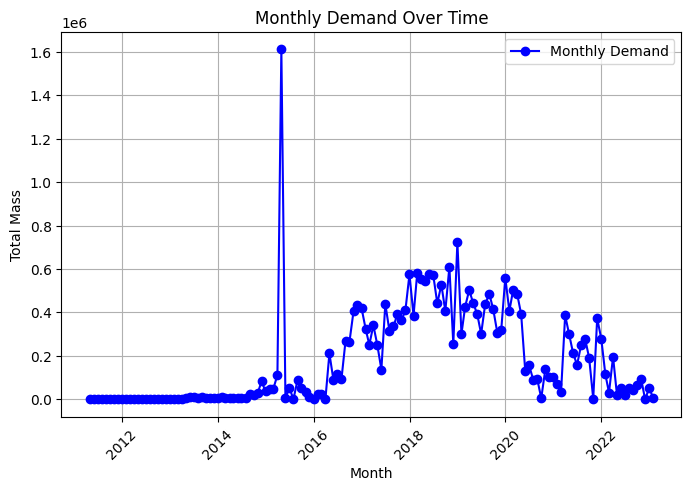

In [116]:
log_monthly_demand = np.log(monthly_demand.replace(0,1))
plt.figure(figsize=(8, 5))
plt.plot(monthly_demand.index, monthly_demand.values, marker='o',linestyle='-',  color='blue', label='Monthly Demand')
plt.title('Monthly Demand Over Time')
plt.xlabel('Month')
plt.ylabel('Total Mass')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


<span style="font-size: 30px;">**Feature Engineering**</span>

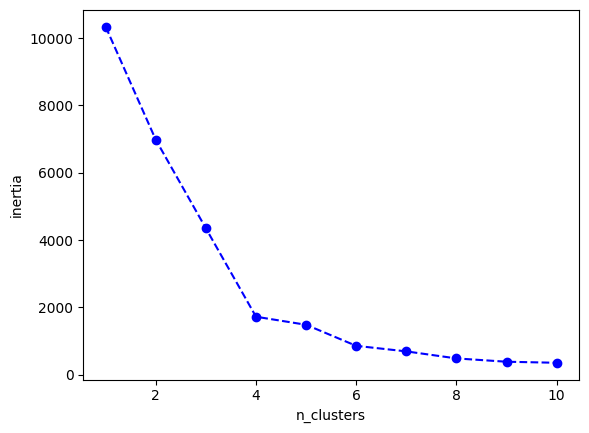

In [117]:
from sklearn.cluster import KMeans
n_clusters = range(1, 11)
inertias = []
for num in n_clusters:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=num))
    kmeans.fit(df[['Latitude', 'Longitude']])
    inertias.append(kmeans[1].inertia_)
plt.plot(n_clusters, inertias, 'bo--')
plt.xlabel('n_clusters')
plt.ylabel('inertia')
plt.show()

In [118]:
kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=4))
kmeans.fit(df[['Latitude', 'Longitude']])
df['Region'] = kmeans[1].labels_

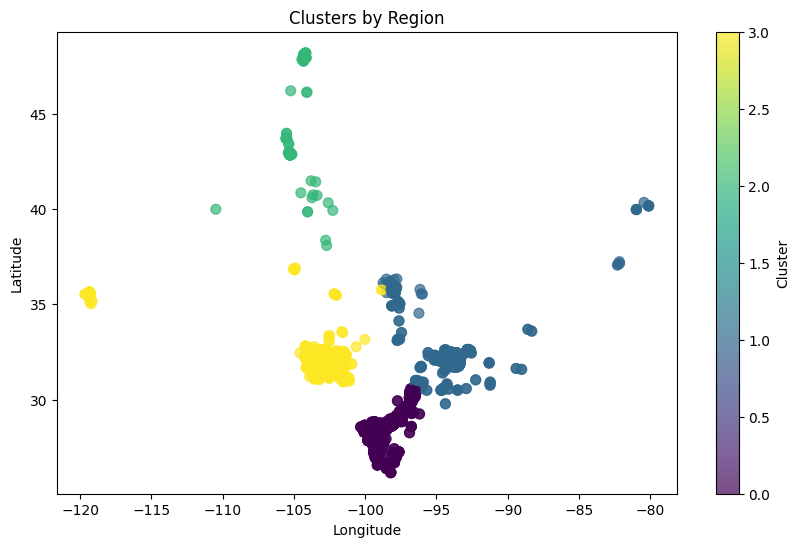

In [119]:

# Scatter plot of Latitude and Longitude with cluster coloring
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=df['Region'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.title('Clusters by Region')
plt.show()


In [120]:
df['bgOperatorName'].value_counts()

,count
bgOperatorName,
carrizo,421
indigo,293
eog,275
bpx,232
trinity,212
...,...
veritas energy,1
reliance,1
highlands natural resources,1


In [121]:
df.set_index('DateTime', inplace=True)



In [122]:
df['location'] = df['bgCountyName'] + ',' + df['bgStateName']
df.columns

Index(['no_chem_recs', 'carrier_status', 'UploadKey', 'bgLatitude', 'Latitude',
       'TotalBaseWaterVolume', 'StateName', 'WellName',
       'TotalBaseNonWaterVolume', 'TVD', 'bgLongitude', 'APINumber',
       'Longitude', 'OperatorName', 'CountyName', 'primarySupplier', 'date',
       'bgCountyName', 'bgStateName', 'bgOperatorName', 'IngredientName',
       'bgCAS', 'calcMass', 'Supplier', 'PercentHFJob', 'bgSupplier',
       'TradeName', 'is_valid_cas', 'categoryCAS', 'Purpose', 'CASNumber',
       'bgIngredientName', 'week', 'Region', 'location'],
      dtype='object')

In [126]:
biweekly_demand = (
    df[df['year']>2015].groupby(['week','year','bgOperatorName','location'])
    .resample('W')['calcMass']
    .sum()
    .reset_index()
    .rename(columns={'calcMass': 'biweekly_mass', 'bgOperatorName':'operator'})
)

In [127]:

biweekly_demand = biweekly_demand.sort_values(by=['operator', 'DateTime'])

# Create lag features for past biweekly demand
biweekly_demand['lag_1'] = biweekly_demand.groupby('operator')['biweekly_mass'].shift(1)
biweekly_demand['lag_2'] = biweekly_demand.groupby('operator')['biweekly_mass'].shift(2)


In [128]:
biweekly_demand.head()

,week,year,operator,location,DateTime,biweekly_mass,lag_1,lag_2
1089,45,2018,aethon,"nacogdoches,texas",2018-11-11,5251.017391,NaN,NaN
874,37,2017,ageron,"frio,texas",2017-09-17,7380.504698,NaN,NaN
906,38,2017,ageron,"frio,texas",2017-09-24,9273.246747,7380.504698,NaN
408,18,2018,ageron,"frio,texas",2018-05-06,7106.711889,9273.246747,7380.504698
427,19,2018,ageron,"frio,texas",2018-05-13,5385.089758,7106.711889,9273.246747


In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


def loss(y_true, y_pred):
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    R2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(MSE)

    print(f'RMSE: {rmse}\nMAE is {MAE}\nMSE is {MSE}\nR2 score is {R2}')

In [131]:
from sklearn.base import BaseEstimator, TransformerMixin

class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, target_column, encode_column):
        self.target_column = target_column
        self.encode_column = encode_column
        self.mapping = {}

    def fit(self, X, y):
        # Ensure the encode column exists in X
        if self.encode_column not in X.columns:
            raise KeyError(f"Column '{self.encode_column}' not found in X.")

        # Compute mean target value for each category in the encode_column
        df = X.copy()
        df[self.target_column] = y
        self.mapping = df.groupby(self.encode_column)[self.target_column].mean().to_dict()
        return self

    def transform(self, X):
        # Replace the encode_column with the mean target value
        X_transformed = X.copy()
        if self.encode_column not in X_transformed.columns:
            raise KeyError(f"Column '{self.encode_column}' not found in X.")
        X_transformed[self.encode_column] = X_transformed[self.encode_column].map(self.mapping)
        # Fill NaN values with the global mean of the target
        global_mean = np.mean(list(self.mapping.values()))
        X_transformed[self.encode_column].fillna(global_mean, inplace=True)
        return X_transformed[self.encode_column]


In [132]:
df_m4 = biweekly_demand

In [133]:
df_m4['log_mass'] = np.log1p(df_m4['biweekly_mass'])

In [134]:
tgt = TargetEncoder(target_column='log_mass', encode_column='location')
tgt.fit(df_m4[['location']], df_m4[['log_mass']])
df_m4['Location_enc'] = tgt.transform(df_m4[['location']])

In [135]:
tgt = TargetEncoder(target_column='log_mass', encode_column='operator')
tgt.fit(df_m4[['operator']], df_m4[['log_mass']])
df_m4['operator_enc'] = tgt.transform(df_m4[['operator']])

In [136]:
df_m4.columns

Index(['week', 'year', 'operator', 'location', 'DateTime', 'biweekly_mass',
       'lag_1', 'lag_2', 'log_mass', 'Location_enc', 'operator_enc'],
      dtype='object')

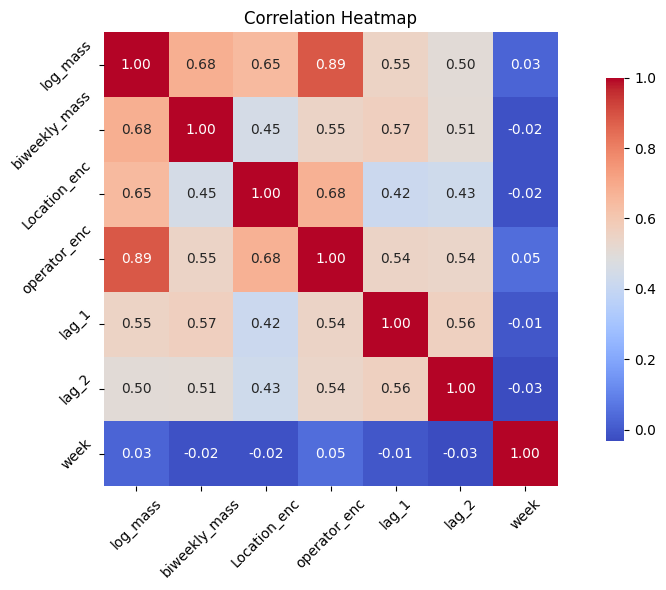

In [137]:
import seaborn as sns

corr_columns = ['log_mass','biweekly_mass','Location_enc','operator_enc', 'lag_1','lag_2','week']
correlation_matrix = df_m4[corr_columns].corr(method = 'pearson')
plt.figure(figsize = (10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap= 'coolwarm', fmt = '.2f', square = True, cbar_kws={'shrink':.8})
plt.title('Correlation Heatmap')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.tight_layout()
plt.show()

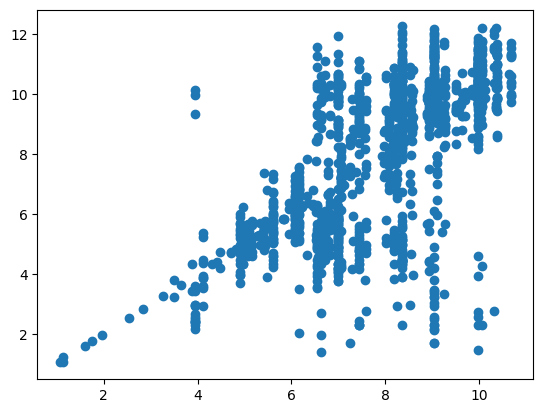

In [138]:
plt.scatter(df_m4['Location_enc'], df_m4['log_mass'])

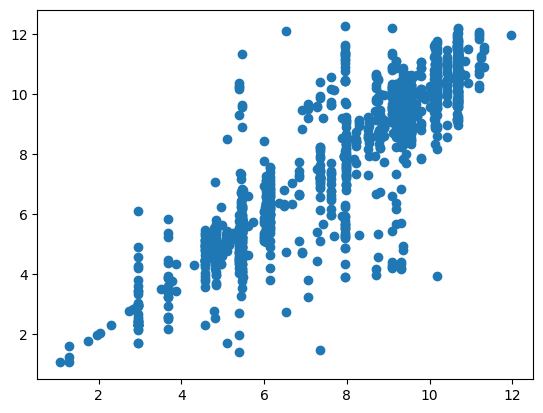

In [139]:
plt.scatter(df_m4['operator_enc'], df_m4['log_mass'])

In [140]:
class Transformer4():
    def fit(self, X, y= None):
        df = pd.DataFrame()

        self.loc_encoder = TargetEncoder(target_column='log_mass', encode_column='location')
        self.loc_encoder.fit(X, y)
        df['location'] = self.loc_encoder.transform(X)
        self.opt_encoder = TargetEncoder(target_column='log_mass', encode_column='operator')
        self.opt_encoder.fit(X, y)
        df['operator'] = self.opt_encoder.transform(X)
        df['loc_opt'] = df['location'] * df['operator']
        df['operator2'] = df['operator'] * df['operator']
        df['lag_1'] =  X['lag_1']
        df['lag_2'] =  X['lag_2']
        self.mean = df.mean()

    def transform(self, X, y= None):
        df = pd.DataFrame()

        df['location'] = self.loc_encoder.transform(X)
        df['operator'] = self.opt_encoder.transform(X)
        df['loc_opt'] = df['location'] * df['operator']
        df['operator2'] = df['operator'] * df['operator']
        df['lag_1'] =  X['lag_1']
        df['lag_2'] =  X['lag_2']

        df.fillna(self.mean, inplace = True)
        self.features = df.columns

        return df

    def fit_transform(self, X, y = None):
        self.fit(X,y)
        return self.transform(X)


In [141]:

features = list(df_m4.columns)
target = 'log_mass'
features.remove(target)
X = df_m4[features]
y = df_m4[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [142]:
steps_lr = [('tf', Transformer4()),
          ('rescaler', MinMaxScaler()),
          ('lr', LinearRegression())]

model_lr = Pipeline(steps_lr)
model_lr.fit(X_train, y_train)
y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)
print('Training:')
loss(y_train, y_train_pred)
print('Testing:')
loss(y_test, y_test_pred)

Training:
RMSE: 1.1817601467798018
MAE is 0.7998729402085785
MSE is 1.3965570445170188
R2 score is 0.7949482710911636
Testing:
RMSE: 1.3385969112344658
MAE is 0.8975143069863276
MSE is 1.7918416907664523
R2 score is 0.7385428965572103


In [143]:
steps_rfr = [('tf', Transformer4()),
          ('rfr', RandomForestRegressor())]

model_rfr = Pipeline(steps_rfr)
model_rfr.fit(X_train, y_train)
y_train_pred = model_rfr.predict(X_train)
y_test_pred = model_rfr.predict(X_test)
print('Training:')
loss(y_train, y_train_pred)
print('Testing:')
loss(y_test, y_test_pred)


Training:
RMSE: 0.449770322958811
MAE is 0.2981215975045034
MSE is 0.20229334341447314
R2 score is 0.9702979552630933
Testing:
RMSE: 1.2491728411671201
MAE is 0.8180163363069243
MSE is 1.5604327871095354
R2 score is 0.772308994294968


[0.02487404 0.19007552 0.40707233 0.23829994 0.08686862 0.05280955]


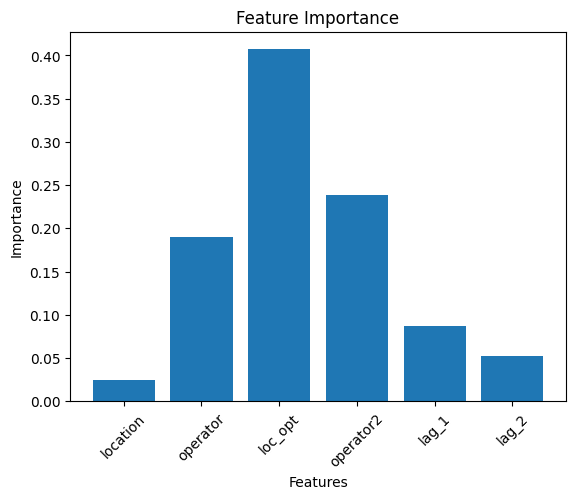

In [144]:
feature_importance = model_rfr.steps[1][1].feature_importances_
features = model_rfr.steps[0][1].features
print(feature_importance)
plt.bar(features, feature_importance)
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [44]:
'''
steps_xgb = [('tf', Transformer4()),
          ('xgb', XGBRegressor())]

model_xgb = Pipeline(steps_xgb)
model_xgb.fit(X_train, y_train)
y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)
print('Training:')
loss(y_train, y_train_pred)
print('Testing:')
loss(y_test, y_test_pred)
'''

"\nsteps_xgb = [('tf', Transformer4()),\n          ('xgb', XGBRegressor())]\n\nmodel_xgb = Pipeline(steps_xgb)\nmodel_xgb.fit(X_train, y_train)\ny_train_pred = model_xgb.predict(X_train)\ny_test_pred = model_xgb.predict(X_test)\nprint('Training:')\nloss(y_train, y_train_pred)\nprint('Testing:')\nloss(y_test, y_test_pred)\n"

<span style = 'font-size: 30px;'>**Tune Hyperparameters**</span>

In [45]:
param_grid_rfr = {
    'rfr__max_depth': [5,10, 20, 30],
    'rfr__min_samples_split': [2, 5, 10],
    'rfr__min_samples_leaf': [2, 4, 6]
}

rf = Pipeline(steps_rfr)
# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rfr, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit to the data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)
print('Training:')
loss(y_train, y_train_pred)
print('Testing:')
loss(y_test, y_test_pred)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'rfr__max_depth': 10, 'rfr__min_samples_leaf': 2, 'rfr__min_samples_split': 2}
Training:
RMSE: 1.687949021432463
MAE is 0.7119308480268296
MSE is 2.84917189895481
R2 score is 0.5987809538584443
Testing:
RMSE: 1.8877191476037092
MAE is 0.8200351506920484
MSE is 3.5634835802296743
R2 score is 0.5280339735170321


In [46]:
'''
param_grid_xgb = {
    'xgb__max_depth': [3, 5, 10, 20],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    #'xgb__n_estimators': [100, 200, 300]
}

xgb = Pipeline(steps_xgb)
# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Fit to the data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

y_train_pred = grid_search.best_estimator_.predict(X_train)
y_test_pred = grid_search.best_estimator_.predict(X_test)
print('Training:')
loss(y_train, y_train_pred)
print('Testing:')
loss(y_test, y_test_pred)
'''

'\nparam_grid_xgb = {\n    \'xgb__max_depth\': [3, 5, 10, 20],\n    \'xgb__min_child_weight\': [1, 3, 5],\n    \'xgb__learning_rate\': [0.01, 0.1, 0.2],\n    #\'xgb__n_estimators\': [100, 200, 300]\n}\n\nxgb = Pipeline(steps_xgb)\n# Set up the GridSearchCV\ngrid_search = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, scoring=\'neg_mean_squared_error\', verbose=2, n_jobs=-1)\n\n# Fit to the data\ngrid_search.fit(X_train, y_train)\n\n# Best parameters\nprint("Best Parameters:", grid_search.best_params_)\n\ny_train_pred = grid_search.best_estimator_.predict(X_train)\ny_test_pred = grid_search.best_estimator_.predict(X_test)\nprint(\'Training:\')\nloss(y_train, y_train_pred)\nprint(\'Testing:\')\nloss(y_test, y_test_pred)\n'

In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np


In [145]:
df = df_m4[['biweekly_mass','log_mass','operator','location','lag_1', 'lag_2', 'week']]
# Label encode operator and location
le_operator = LabelEncoder()
le_location = LabelEncoder()

df['operator_enc'] = le_operator.fit_transform(df['operator'])
df['location_enc'] = le_location.fit_transform(df['location'])

# View the encoded DataFrame
print(df[['operator', 'operator_enc', 'location', 'location_enc']])


           operator  operator_enc           location  location_enc
1089         aethon             0  nacogdoches,texas            78
874          ageron             1         frio,texas            42
906          ageron             1         frio,texas            42
408          ageron             1         frio,texas            42
427          ageron             1         frio,texas            42
...             ...           ...                ...           ...
1038      wildhorse           131          lee,texas            65
1065      wildhorse           131     burleson,texas            15
1152            xto           132     atascosa,texas             5
1237            xto           132     atascosa,texas             5
956   xtreme energy           133     jim hogg,texas            56

[1296 rows x 4 columns]


In [146]:
# Define features and target
numerical_features = df[['lag_1', 'lag_2', 'week']].fillna(0).values  # Fill NaN lags with 0
operator_indices = df['operator_enc'].values
location_indices = df['location_enc'].values
y = df['log_mass'].values

# Normalize the numerical features
scaler = StandardScaler()
numerical_features = scaler.fit_transform(numerical_features)

# Convert to tensors
numerical_features = torch.tensor(numerical_features, dtype=torch.float32)
operator_indices = torch.tensor(operator_indices, dtype=torch.long)  # Must be long for embeddings
location_indices = torch.tensor(location_indices, dtype=torch.long)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Reshape target to fit neural network input

# Train-test split
X_train_num, X_test_num, op_train, op_test, loc_train, loc_test, y_train, y_test = train_test_split(
    numerical_features, operator_indices, location_indices, y, test_size=0.2, random_state=42
)


In [147]:
class DemandNNWithEmbeddings(nn.Module):
    def __init__(self, num_operators, num_locations, input_size, embedding_dim=10):
        super(DemandNNWithEmbeddings, self).__init__()

        # Embedding layers
        self.operator_embedding = nn.Embedding(num_operators, embedding_dim)
        self.location_embedding = nn.Embedding(num_locations, embedding_dim)

        # Fully connected layers
        self.fc1 = nn.Linear(input_size + 2 * embedding_dim, 128)  # Numerical features + embeddings
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, 1)

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, num_features, operator_idx, location_idx):
        # Embedding lookup
        operator_embed = self.operator_embedding(operator_idx)
        location_embed = self.location_embedding(location_idx)

        # Concatenate numerical features with embeddings
        x = torch.cat((num_features, operator_embed, location_embed), dim=1)

        # Pass through fully connected layers
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.output(x)
        return x


In [148]:
# Initialize the model
num_operators = df['operator_enc'].nunique()
num_locations = df['location_enc'].nunique()
input_size = numerical_features.shape[1]

model = DemandNNWithEmbeddings(num_operators, num_locations, input_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [149]:
# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()

    # Forward pass
    predictions = model(X_train_num, op_train, loc_train)
    loss = criterion(predictions, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 50 epochs
    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')


Epoch 0, Loss: 68.0252
Epoch 50, Loss: 1.4938
Epoch 100, Loss: 0.9169
Epoch 150, Loss: 0.7838
Epoch 200, Loss: 0.7244
Epoch 250, Loss: 0.6876
Epoch 300, Loss: 0.6596
Epoch 350, Loss: 0.6365
Epoch 400, Loss: 0.6165
Epoch 450, Loss: 0.5969


# **Per-User Mean Benchmark**

In [53]:
import pandas as pd

df_m4 = pd.read_csv('Dec6M4.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Dec6M4.csv'

In [150]:
df_m4.columns

Index(['week', 'year', 'operator', 'location', 'DateTime', 'biweekly_mass',
       'lag_1', 'lag_2', 'log_mass', 'Location_enc', 'operator_enc'],
      dtype='object')

In [152]:
import numpy as np
from sklearn.metrics import mean_squared_error
df_m4['mean_demand'] = df_m4.groupby('operator')['log_mass'].transform('mean')
rmse_per_user = np.sqrt(mean_squared_error(df_m4['log_mass'],df_m4['mean_demand']))
print(f'RMSE benchmark: {rmse_per_user}')

RMSE benchmark: 1.2149373854952497
